<a href="https://colab.research.google.com/github/pranay-ar/Identification-of-COVID-19-Using-X-Rays/blob/main/COVID19_IISc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                                 **COVID-19 IMAGE CLASSIFIER**



As the first step, I have downloaded the images from the [github repository](https://github.com/ieee8023/covid-chestxray-dataset) of Dr Joseph Paul Cohen which had a mixture of COVID-19 and other X-Rays too. So I extracted the COVID-19 Images from the metadata.csv file and prepared a new folder consisting of COVID-19 X-Rays and [normal X-Rays](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia). I had gotten 196 COVID 19 X-Rays useful for image classification from the repository of Dr Paul Cohen. Then I uploaded the folder on dropbox and we'll be downloading that zip file from the dropbox in the first step.



In [43]:
!wget https://bit.ly/iisc-eval

--2020-11-21 12:09:03--  https://bit.ly/iisc-eval
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.dropbox.com/s/vyqurumule9q9v3/dataset.zip?dl=0 [following]
--2020-11-21 12:09:03--  https://www.dropbox.com/s/vyqurumule9q9v3/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/vyqurumule9q9v3/dataset.zip [following]
--2020-11-21 12:09:03--  https://www.dropbox.com/s/raw/vyqurumule9q9v3/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb90edd89a7a31a5aef93dab11a.dl.dropboxusercontent.com/cd/0/inline/BDncsaXYkdQegcVOtAoVLzKJMbVsOz0QSQ14Q2BRl1AoHU1z

**Unzipping the file containing the dataset folder:**


In [ ]:
!unzip iisc-eval

Archive:  iisc-eval
replace CovidDataset/Train/Normal/IM-0474-0001.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace CovidDataset/Train/Normal/IM-0480-0001.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

**Defining the path variables for the training and validation(named here as test just for naming purposes) folders:**


In [4]:
train_path='CovidDataset/Train'
test_path='CovidDataset/Test'

**Importing all the necessary libraries we might need for the Image Classification Process**

In [5]:
import keras, os 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation, Dropout
from keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
from keras.optimizers import SGD
from google.colab.patches import cv2_imshow
from keras.models import Model
from keras.preprocessing import image

**Peforming Data Augmenation for the training images and rescaling both the training and test images by a scale of 255: 

In [6]:
train_datagen = image.ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True,)
test_dataset = image.ImageDataGenerator(rescale=1./255)

In [31]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 314 images belonging to 2 classes.
Found 78 images belonging to 2 classes.


**Designing the architecture of a custom CNN Model. I had chosen a custom CNN instead of a prebuilt model like VGG16 since the data was really less (314 training images in total), the features were fine grained and the model was ridiculously slow during the training process and was not converging in the end.**

In [27]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 54, 54, 64)       

**Training the model with all the parameters set in the following step:**

In [32]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=10,
    epochs = 25,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/25
10/10 [==============================] - 11s 1s/step - loss: 0.1902 - accuracy: 0.9331 - val_loss: 0.0364 - val_accuracy: 1.0000
Epoch 2/25
10/10 [==============================] - 11s 1s/step - loss: 0.1794 - accuracy: 0.9268 - val_loss: 0.0657 - val_accuracy: 0.9844
Epoch 3/25
10/10 [==============================] - 11s 1s/step - loss: 0.0944 - accuracy: 0.9841 - val_loss: 0.0284 - val_accuracy: 1.0000
Epoch 4/25
10/10 [==============================] - 11s 1s/step - loss: 0.1965 - accuracy: 0.9522 - val_loss: 0.0773 - val_accuracy: 0.9844
Epoch 5/25
10/10 [==============================] - 11s 1s/step - loss: 0.1508 - accuracy: 0.9554 - val_loss: 0.0522 - val_accuracy: 0.9844
Epoch 6/25
10/10 [==============================] - 11s 1s/step - loss: 0.1078 - accuracy: 0.9682 - val_loss: 0.0240 - val_accuracy: 1.0000
Epoch 7/25
10/10 [==============================] - 11s 1s/step - loss: 0.1080 - accuracy: 0.9650 - val_loss: 0.0288 - val_accuracy: 0.9844
Epoch 8/25
10/10 [==

**Visualising the results I have gotten through a graph:**

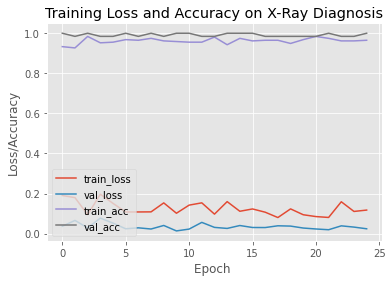

In [33]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
N = 25
plt.plot(np.arange(0, N), hist.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), hist.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), hist.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on X-Ray Diagnosis")
plt.xlabel("Epoch ")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

**Saving the model so as to gain a more comprehensive view of the resulting model in the following steps:**

In [34]:
model.save("model.h5")

In [35]:
from keras import models
model=models.load_model("model.h5")

**I have decided to visualise the result of the trained model on the test set using a confusing matrix:**

In [36]:
from sklearn.metrics import confusion_matrix

**Declaring an empty list so as to fill them with the ground truth labels and labels declared by our model:**

In [37]:
y_test=[]
y_actual=[]

**Passing the test images to the compiled model for the prediction stage:**

In [38]:
for i in os.listdir('CovidDataset/Test/Normal/'):
  img=image.load_img("./CovidDataset/Test/Normal/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [39]:
for i in os.listdir('CovidDataset/Test/Covid/'):
  img=image.load_img("./CovidDataset/Test/Covid/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

**Converting the results we have got into an array to perform visualisation:**

In [40]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

**Creating the Confusion Matrix:**

In [41]:
cm=confusion_matrix(y_actual,y_test)

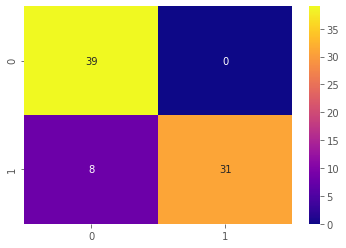

In [42]:
import seaborn as sb
sb.heatmap(cm,cmap='plasma',annot=True)